<a href="https://colab.research.google.com/github/aayushchourasia123/Hackathon-Project/blob/main/Fraud%20Detection%20Using%20Logistic%20Regression(Supervised%20Learning)/Fraud_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
sns.set(style='whitegrid')


In [13]:
df=pd.read_csv('AIML Dataset.csv')

In [14]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [17]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [18]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [19]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [20]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [21]:
df.shape

(6362620, 11)

In [22]:
round((df['isFraud'].value_counts()[1] / df.shape[0]) * 100,2) #fraud percentage in data is 0.13%

0.13

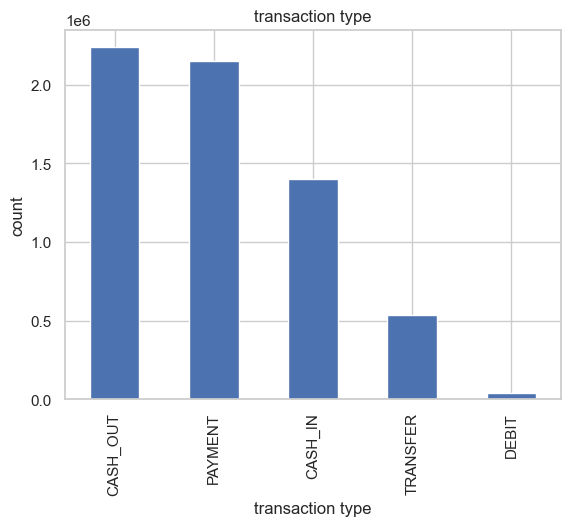

In [23]:
df['type'].value_counts().plot(kind='bar',title='transaction type')
plt.xlabel('transaction type')
plt.ylabel('count')
plt.show()

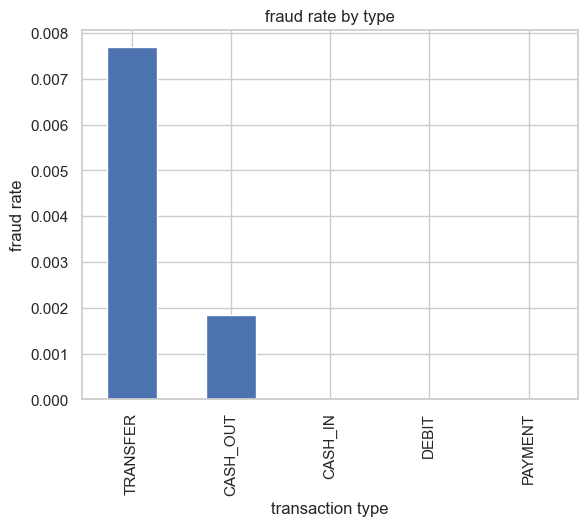

In [24]:
fraud_by_type=df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar',title='fraud rate by type')
plt.xlabel('transaction type')
plt.ylabel('fraud rate')
plt.show()

In [25]:
fraud_by_type

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [26]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

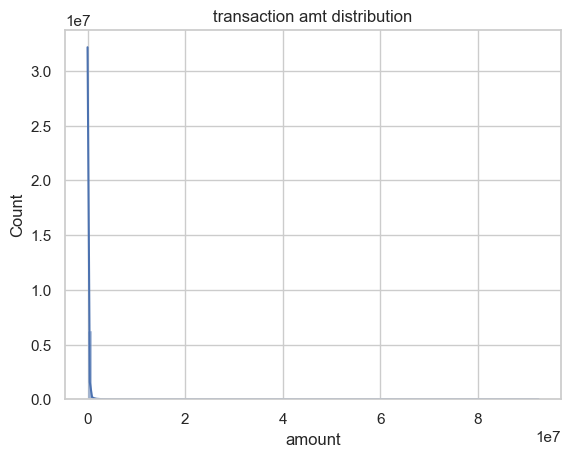

In [27]:
#without log transformation
sns.histplot(df['amount'].astype(int),kde=True,bins=100)
plt.title('transaction amt distribution')
plt.xlabel('amount')

plt.show() #right skewed

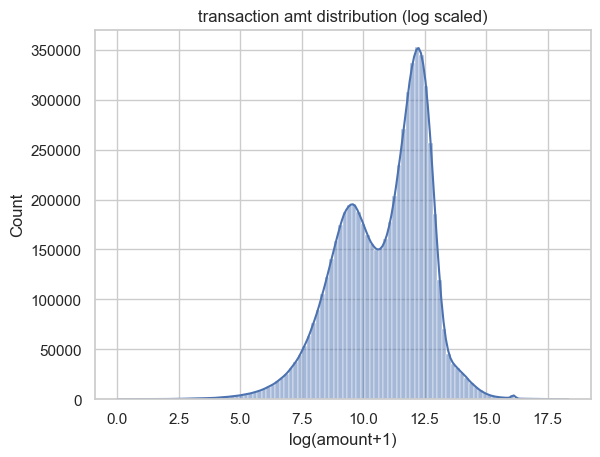

In [28]:
#applying log transformation on amount
#numpy.log1p (often abbreviated as np.log1p) is a function within the NumPy library in Python that computes the natural logarithm of 1 + x for each element x in an input array or scalar.
sns.histplot(np.log1p(df['amount']),kde=True,bins=100)
plt.title('transaction amt distribution (log scaled)')
plt.xlabel('log(amount+1)')

plt.show()

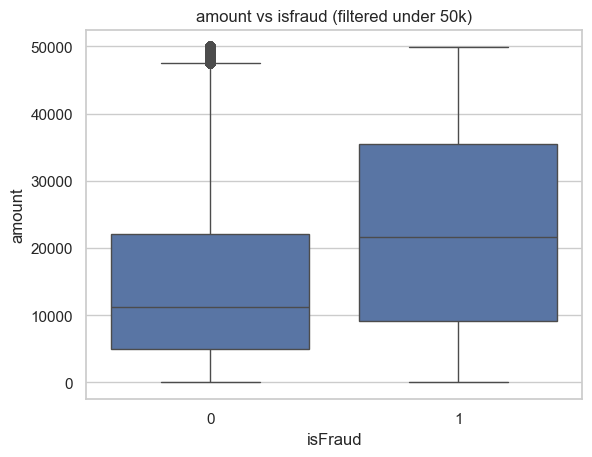

In [29]:
sns.boxplot(data=df[df['amount']<50000],x='isFraud',y='amount')
plt.title('amount vs isfraud (filtered under 50k)')
plt.show()

In [30]:
df["balanceDiffOrg"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"]=df["newbalanceDest"]-df["oldbalanceDest"]

In [31]:
(df["balanceDiffOrg"]<0).sum()

1399253

In [32]:
(df["balanceDiffDest"]<0).sum()

1238864

In [33]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


In [34]:
fraud_per_step=df[df['isFraud']==1]['step'].value_counts().sort_index()
fraud_per_step

step
1      16
2       8
3       4
4      10
5       6
       ..
739    10
740     6
741    22
742    14
743     8
Name: count, Length: 741, dtype: int64

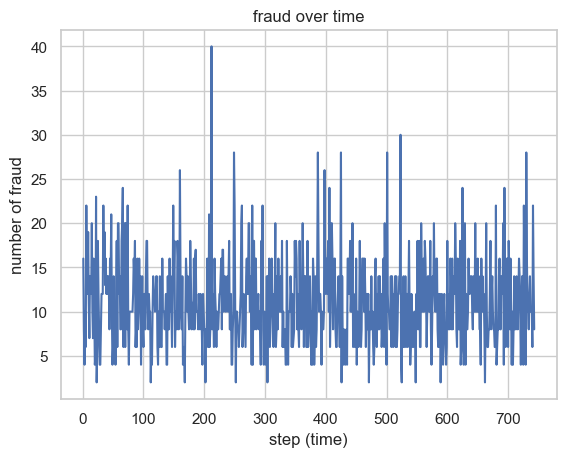

In [35]:
fraud_per_step=df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(fraud_per_step.index,fraud_per_step.values, label='fraud per step')
plt.xlabel('step (time)')
plt.ylabel('number of fraud')
plt.title('fraud over time')
plt.grid(True)
plt.show()



In [36]:
df.drop(columns='step',inplace=True) #dropping step since not time dependent

In [37]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [38]:
top_sender=df['nameOrig'].value_counts().head(10)

In [39]:
top_sender

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [40]:
top_receiver=df['nameDest'].value_counts().head(10)

In [41]:
top_receiver

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [42]:
fraud_users=df[df['isFraud']==1]['nameOrig'].value_counts().head(10)

In [43]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [44]:
fraud_type=df[df['type'].isin(['CASH_OUT','TRANSFER'])]

In [45]:
fraud_type

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,15325.00,46430.44
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,705.00,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,10835.00,2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,339682.13
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00


In [46]:
fraud_type['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

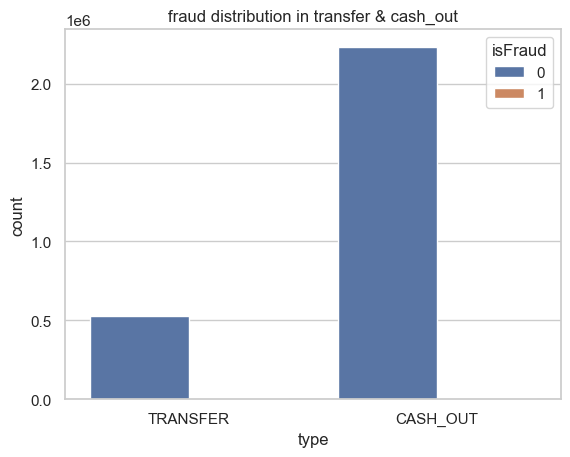

In [47]:
sns.countplot(data=fraud_type,x='type',hue='isFraud')
plt.title('fraud distribution in transfer & cash_out')
plt.show()

In [48]:
df.head(2)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


In [49]:
corr=df[['amount','oldbalanceOrg','newbalanceOrig','newbalanceDest','oldbalanceDest','isFraud']].corr()

In [50]:
corr

,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest,oldbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.459304,0.294137,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.042029,0.066243,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.041837,0.067812,-0.008148
newbalanceDest,0.459304,0.042029,0.041837,1.000000,0.976569,0.000535
oldbalanceDest,0.294137,0.066243,0.067812,0.976569,1.000000,-0.005885
isFraud,0.076688,0.010154,-0.008148,0.000535,-0.005885,1.000000


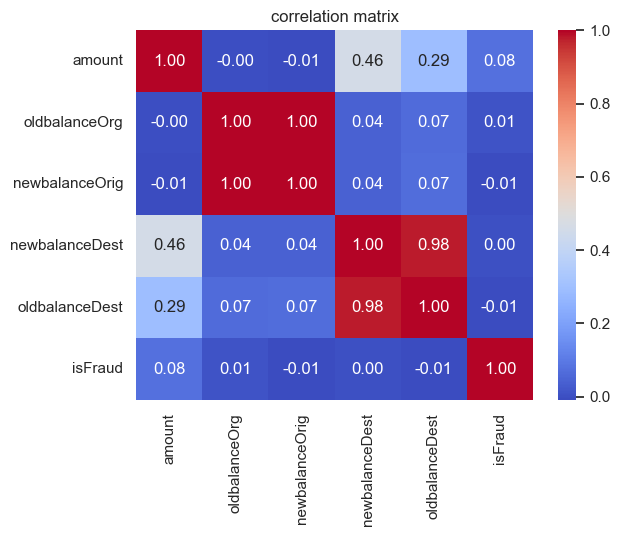

In [51]:
#corr take values between -1 & 1
#+1 means strong +ve relationship
#-1 means strong -ve relationship
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation matrix')
plt.show()

In [52]:
zero_after_transfer=df[
    (df['oldbalanceOrg']>0) & (df['newbalanceOrig']==0) & (df['type'].isin(['TRANSFER','CASH_OUT']))
    ]

In [53]:
zero_after_transfer.shape

(1188074, 12)

In [54]:
len(zero_after_transfer)

1188074

In [55]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


# feature engineering and training a ml model

In [57]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [59]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [60]:
df_model=df.drop(columns=['nameOrig','nameDest','isFlaggedFraud'])

In [61]:
df_model

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,9839.64,0.00
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,1864.28,0.00
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,181.00,-21182.00
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,339682.13,339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,6311409.28,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,6311409.28,6311409.27
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,850002.52,0.00


In [62]:
categorical=['type']
numerical=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [63]:
x=df_model.drop(columns='isFraud')
y=df_model['isFraud']

In [64]:
#The stratify parameter in the train_test_split function from scikit-learn is used to ensure that the split of the dataset into training and testing sets maintains the same proportion of classes as the original dataset.
#When stratify is set to the target variable (e.g., y in a classification problem), train_test_split will create training and testing sets where the distribution of classes is similar to the distribution in the complete dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [65]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical),
        ('cat',OneHotEncoder(drop='first'),categorical)
    ],
    remainder='drop'
)

Why class_weight='balanced' is used?

Fraud detection datasets are highly imbalanced:

Non-fraud (majority class) = 99.9% of rows

Fraud (minority class) = 0.1% of rows

👉 If you train a model without handling imbalance:

The model may just predict “not fraud” for everything and still get 99.9% accuracy.

But it will completely miss the few fraud cases (high accuracy, but useless recall for fraud).

In [67]:
pipeline= Pipeline([
    ('prep',preprocessor),
    ('clf',LogisticRegression(class_weight='balanced',max_iter=1000))
])

In [68]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [69]:
y_pred=pipeline.predict(x_test)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.94      0.97   1908786



In [71]:
confusion_matrix(y_test,y_pred)

array([[1801445,  104877],
       [    139,    2325]], dtype=int64)

In [72]:
pipeline.score(x_test,y_test)*100 #94% accuracy

94.4982832019933

In [73]:
import joblib
joblib.dump(pipeline,'fraud_detection_pipeline.joblib')

['fraud_detection_pipeline.joblib']

In [135]:

joblib.dump(pipeline,'model.joblib')

['model.joblib']